# Loan approval system(LAS)


* A large international financial conglomerate is realizing the still untapped potential of the Brazilian credit market and, taking advantage of the era of "Open Banking", is landing on Brazilian soil, founding the
FINTECH "Easy Credit" 

* Like every Data-driven company, the company's HR is selecting Data Scientists in Practice, so they can develop a LEND APPROVAL SYSTEM - online - with a Data Science solution. 

*  Your goal is exactly this:
Build a Loan Approval System with Machine Learning and Python Programming, detailing each step of the process of building your Predictive Machine. 


DATASET INFO

---










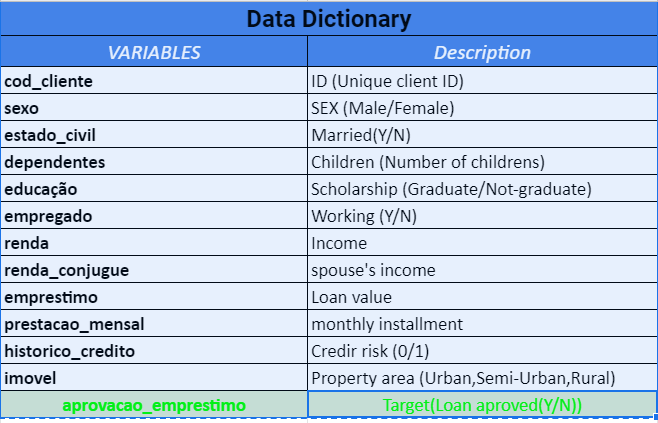

# **Preparing Workspace**

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

## Loading Data

In [ ]:
df=pd.read_csv('../input/loan-approval-systemlas/clientes.csv')
print('Data is loaded')

# Preliminary analysis

## Preview of Dataset

In [ ]:
df.head(20)

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
df.info()

## Shape of dataset

In [ ]:
print(f'Shape of the Dataset is: {df.shape}')

# Cleaning Data

## Checking for duplicate values 


In [ ]:
df.duplicated().sum()

## Missing Values

In [ ]:
df.isnull().sum()

We will replace the missing values of each of the the categorical columns with its most frequent class.

In [ ]:
def impute_nan(variable,df):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
missing_categorical = ['sexo','estado_civil','dependentes','empregado','historico_credito']
for variable in missing_categorical:
    impute_nan(variable,df)

For the continuos data column, lets replace the null values with respective Median

In [ ]:
missing_continuos = ['emprestimo','prestacao_mensal']
for variable in missing_continuos:
    df[variable].fillna(df[variable].median(),inplace=True)

In [ ]:
df.isnull().sum()

# Categorical and Continuos

Some variables were misclassified as we can see.

We want to convert the 'renda_conjuge'column to float,but there is a problem, we have an outlier. which is probably an error, so we have to fix it 

In [ ]:
#df['renda_conjuge'] = pd.to_numeric(df['renda_conjuge'])

ERROR

Unable to parse string "9.857.999.878" at position 282



In [ ]:
#checking line 282 
df.iloc[282]

In [ ]:
#first let's replace. to " " 
df["renda_conjuge"] = df["renda_conjuge"].str.replace('.',"")

In [ ]:
# converting 'renda_conjuge' from str to float
df["renda_conjuge"] = df["renda_conjuge"].apply(np.int64)

We have some values that are above a million, in the variable 'renda_conjuge'. which could be typos, or some error that happened in the database, and we decided that we are going to delete these values, which can hinder the construction of predictive machines and data analysis 

In [ ]:
df.loc[(df['renda_conjuge'])>=1000000]

In [ ]:
#deleting lines with values above one million from variable 'renda_conjuge' 
df.drop(df[df.renda_conjuge > 100000].index, inplace=True)
df.loc[(df['renda_conjuge'])>=1000000]

In [ ]:
df.dtypes

In [ ]:
categorical = ['sexo', 'estado_civil','dependentes','educacao','empregado','historico_credito','imovel','aprovacao_emprestimo']
continous = ['renda','renda_conjuge', 'emprestimo', 'prestacao_mensal',]
print('Categorical Variables are:', ', '.join(categorical))
print('Continous Variables are:', ', '.join(continous))

# Exploratory Data Analysis



## Univariate Analysis 

### Histplot for continous variables 

In [ ]:
background_color = "#e0fbfc"
chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#e0fbfc')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].set_facecolor(background_color)
axes[0].text(0.5, 0.5,
             'Histplot for the\n continous features\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')
for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.set_facecolor(background_color)
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    color = sns.color_palette('deep')[i - 1]
    sns.histplot(data=df, y=var, ax=ax, color=color)
    ax.set_xlabel('')
    ax.set_ylabel('')

**Conclusion**

* emprestimo,renda_conjuge and renda have decent amount of outliers that could affect certain models sensitive to them.


### Countplot for categorical features

In [ ]:
background_color="#eaeaf2"

chart_count = len(categorical) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_facecolor(background_color)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for the\n categorical features\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = categorical[i - 1]
    ax = axes[i]
    ax.set_facecolor(background_color)
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')

**Conclusion**

* dependentes is likely to impact few models sensitive to data distribution because value counts for some values is extremely low.

* historico_credito,educacao,empregado and sexo could possibly affect models sensitive to data distribution because their value counts is also not ideal.


## Bivariate Analysis

### Seperation of categorical variables w.r.t to target 

In [ ]:
background_color="#eaeaf2"

chart_count = len(categorical) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]

fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_facecolor(background_color)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Seperation of categorical \nvariables w.r.t to target\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')
for i in range(1, chart_count):
    var = categorical[i - 1]
    ax = axes[i]
    ax.set_facecolor(background_color)
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    colorIndex = (2*(i - 1)) % 10
    color1 = sns.color_palette('deep')[colorIndex]
    color2 = sns.color_palette('deep')[colorIndex + 1]
    sns.countplot(data=df, x=var, ax=ax, hue='aprovacao_emprestimo',
                  palette=[color1, color2])
    ax.set_xlabel('')
    ax.set_ylabel('')

**Conclusion**

* Apparently, the only variable that tends to indicate that a customer will be noncompliant or not,is historico_credito

### Kdeplots for continous variables w.r.t output

In [ ]:
background_color="#eaeaf2"

chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_facecolor(background_color)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Distribution of continous\n variables to target\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')
for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.set_facecolor(background_color)
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    sns.kdeplot(data=df, x=var, hue='aprovacao_emprestimo', ax=ax, fill=True,palette=["#8000ff","#da8829"])
    ax.set_xlabel('')
    ax.set_ylabel('')

**Conclusion**

* As we can see in the graphs,there is no continuous variable that can show that the person will not pay the loan,or even a low income. 

## Check for Multi-Collinearity: Correlation of variables among themselves

In [ ]:
sns.set_style('white')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

corr_matrix = df[continous].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, mask=mask, ax=ax)
fig.text(0.5, 1.05,
         'Correlation of Continous variables (Pearson)',
         horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold', transform=ax.transAxes)
sns.set_style('dark')

In [ ]:
plot_correlation(df)

**Conclusion**

* The only correlation that we were able to notice was, as the increase in income, the higher the loan request 

## EDA/DASHBOARD




In [ ]:
create_report(df)

## CONCLUSION

Here's the conclusion from the entire EDA:

**Feature Insights**

* emprestimo,renda_conjuge and renda have decent amount of outliers that could affect certain models sensitive to them.

* dependentes is likely to impact few models sensitive to data distribution because value counts for some values is extremely low.

* historico_credito,educacao,empregado and sexo could possibly affect models sensitive to data distribution because their value counts is also not ideal.

**Relation to target variable**

* Apparently, the only variable that tends to indicate that a customer will be noncompliant or not,is historico_credito

* As we can see in the graphs,there is no continuous variable that can show that the person will not pay the loan,or even a low income.

**Multi-collinearity**

* Variables do not have strong correlation and are weakly correlated

* The only variables that have any correlation are 'renda' and 'emprestimo'value 



# Model Development

Loading Libraries 

In [ ]:
# import necessary modules

from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC

## Feature Engineering

In [ ]:

df['aprovacao_emprestimo']= df['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [ ]:
#Replacing characters with numbers 

df['sexo']=df['sexo'].map({'Female':0, 'Male':1})
df['empregado']=df['empregado'].map({'No':0, 'Yes':1})


## Division between predictors and class 

In [ ]:
df.columns

In [ ]:
X = df[['sexo','empregado','renda','renda_conjuge','historico_credito']]
y = df.aprovacao_emprestimo
X.shape, y.shape

## Train-Test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)


## saving the variables

In [ ]:
import pickle

with open('loan.pkl', mode = 'wb') as f:
  pickle.dump([x_train,x_test,y_train,y_test], f)

## Classification algorithms

### 1-Majority Learner-68.62%

In [ ]:
model=(420/612)*100
model

In [ ]:
np.unique(df['aprovacao_emprestimo'], return_counts=True)


### 2-LogisticRression-84.55%

In [ ]:
model_rl=LogisticRegression()
model_rl.fit(x_train,y_train)

In [ ]:
cm_rL = ConfusionMatrix(model_rl)
cm_rL.fit(x_train, y_train)
cm_rL.score(x_test, y_test)

In [ ]:
#Saving the predictive machine that gets the best result
pickle_out = open("maquina_preditiva.pkl", mode = "wb") 
pickle.dump(model_rl, pickle_out) 
pickle_out.close()

### 3-AdaBoostClassifier-83.73%

In [ ]:
model_ada=AdaBoostClassifier()
model_ada.fit(x_train,y_train)

In [ ]:
cm_ada = ConfusionMatrix(model_ada)
cm_ada.fit(x_train, y_train)
cm_ada.score(x_test, y_test)

4-RandomForest-79.67%

In [ ]:
model_rf=RandomForestClassifier()
model_rf.fit(x_test,y_test)

In [ ]:
cm_rf = ConfusionMatrix(model_rf)
cm_rf.fit(x_train, y_train)
cm_rf.score(x_test, y_test)

### 4-RidgeClassifier-84.55%

In [ ]:
model_rc=RidgeClassifier()
model_rc.fit(x_train,y_train)

In [ ]:
cm_rc = ConfusionMatrix(model_rc)
cm_rc.fit(x_train, y_train)
cm_rc.score(x_test, y_test)

### 5-SVC-73.18

In [ ]:
model_svc=SVC()
model_svc.fit(x_train,y_train)

In [ ]:
cm_svc = ConfusionMatrix(model_svc)
cm_svc.fit(x_train, y_train)
cm_svc.score(x_test, y_test)